<center> <h1>Mini Project (Golf)</h1> </center>

<h2> Case study</h2>
<img src="https://www.golfchannel.com/sites/default/files/2020/03/19/golf_swing_stock_1920.jpg" width="500" height="500" />

Golf Dataset: Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. Therefore, the research group at Par has been investigating a new golf ball coating designed to resist cuts and provide a more durable ball. The tests with the coating have been promising. One of the researchers voiced concern about the effect of the new coating on driving distances. Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball. To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests. The testing was performed with a mechanical hitting machine so that any difference between the mean distances for the two models could be attributed to a difference in the design. The results of the tests, with distances measured to the nearest yard, are contained in the data set “Golf”.

#####	Assumptions

The sample size of both the samples in the data set is 40 (> 30) from each model of golf ball. Central Limit Theorem states that irrespective of the shape of the original population, the sampling distribution of the mean will approach a normal distribution as the size of the sample increases and becomes large (>30). We also assume that the sample estimate will be reflective of the reality and also the sample size is sufficient for analysis.

#### Step by Step approach

We shall follow step by step approach to arrive to the conclusion as follows:

* 	Exploratory Data Analysis 
* 	Descriptive Statistics 
* 	Data Visualization 
* 	Hypothesis formation 
* 	Selection of appropriate Hypothesis Testing method 
* 	95% Confidence Intervals 
* 	Need of Larger Sample Size
* 	Conclusion and Recommendation.

In [1]:
#Reading of Golf data
golf <- read.csv("../input/golf-ball-testing-data-set-from-par-inc/Golf.csv")


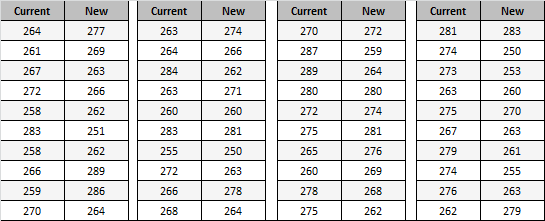

In [2]:
#Spliting the data
Current_golf = golf$Current
New_golf=golf$New

print(paste("The range of Current ball distance test is :",min(Current_golf),"-",max(Current_golf)))
print(paste("The range of New ball distance test is :",min(New_golf),"-",max(New_golf)))


[1] "The range of Current ball distance test is : 255 - 289"
[1] "The range of New ball distance test is : 250 - 289"


In [3]:
library(dplyr)
# N for New Ball,C for Current Ball
#IQR = Inter Quartile Range
golf %>% summarize(IQR_C = IQR(Current),
                   Variance_C = var(Current),
               Std_Variance_C = sqrt(Variance_C),
                        IQR_N = IQR(New),
                   Variance_N = var(New),
               Std_Variance_N = sqrt(Variance_N))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




IQR_C,Variance_C,Std_Variance_C,IQR_N,Variance_N,Std_Variance_N
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12.25,76.61474,8.752985,12.5,97.94872,9.896904


Summary of the given data shows mean and median are close the data is normally distributed. The summary and standard deviations for both columns says that there is no significant change in the driving distance of balls with and without coating.

    Current           New       
 Min.   :255.0   Min.   :250.0  
 1st Qu.:263.0   1st Qu.:262.0  
 Median :270.0   Median :265.0  
 Mean   :270.3   Mean   :267.5  
 3rd Qu.:275.2   3rd Qu.:274.5  
 Max.   :289.0   Max.   :289.0  

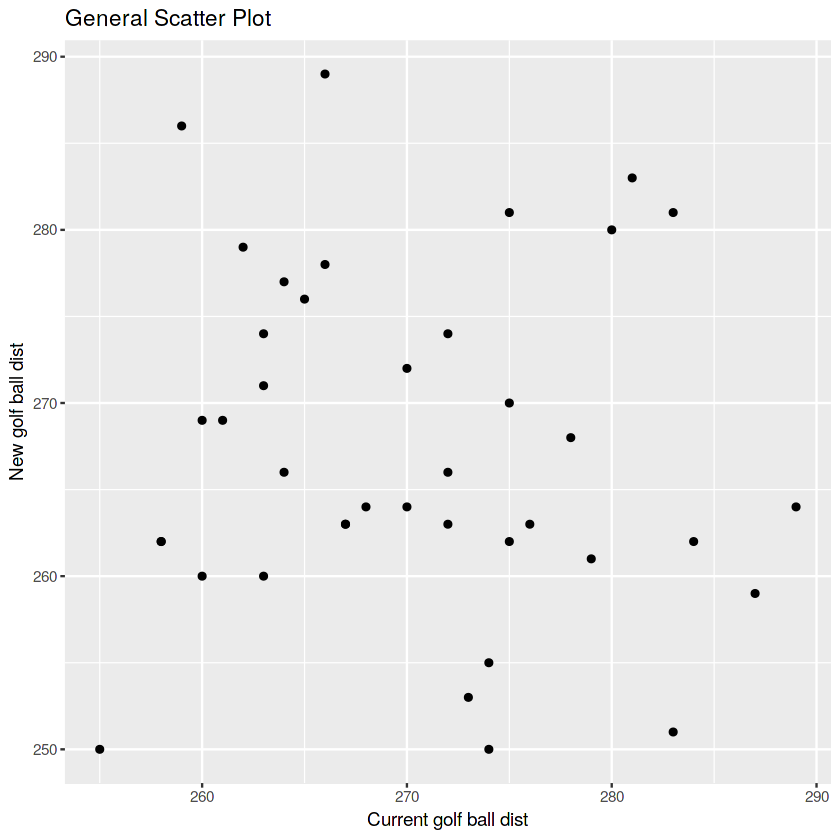

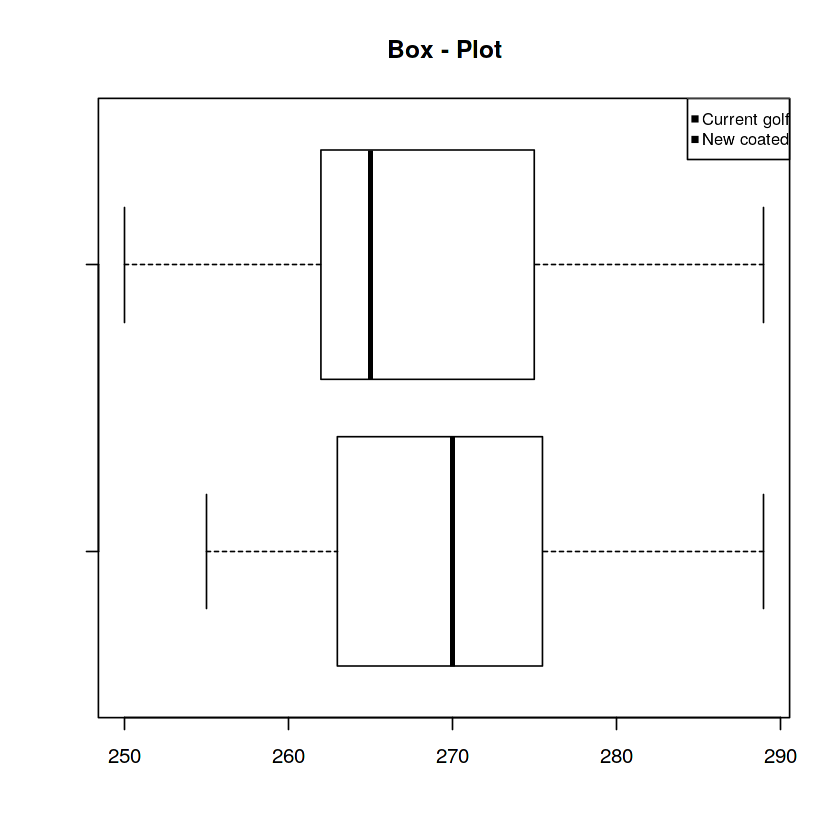

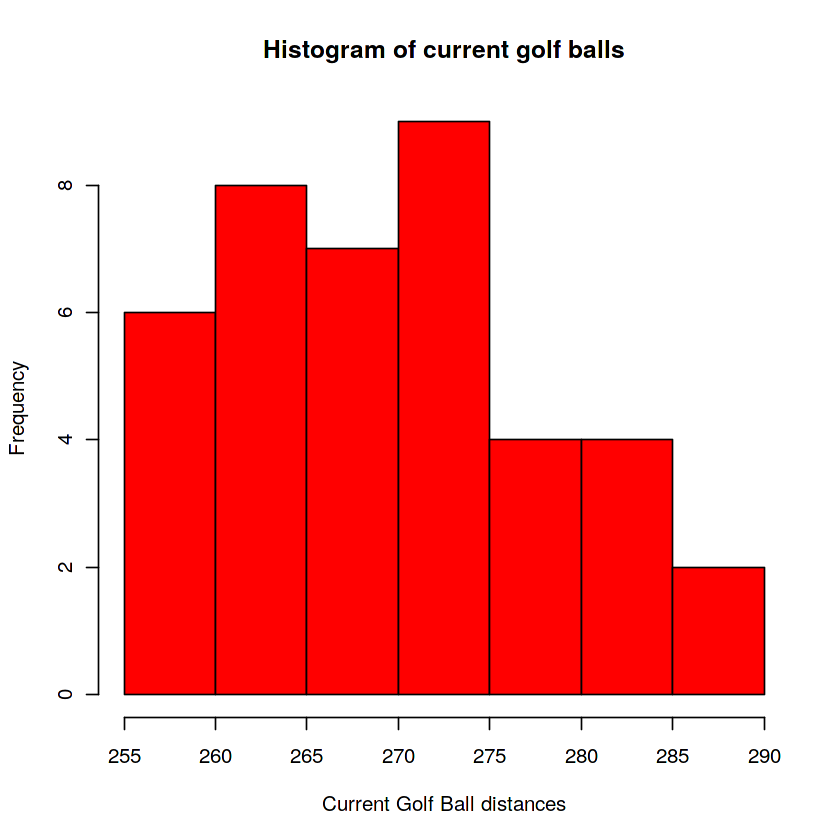

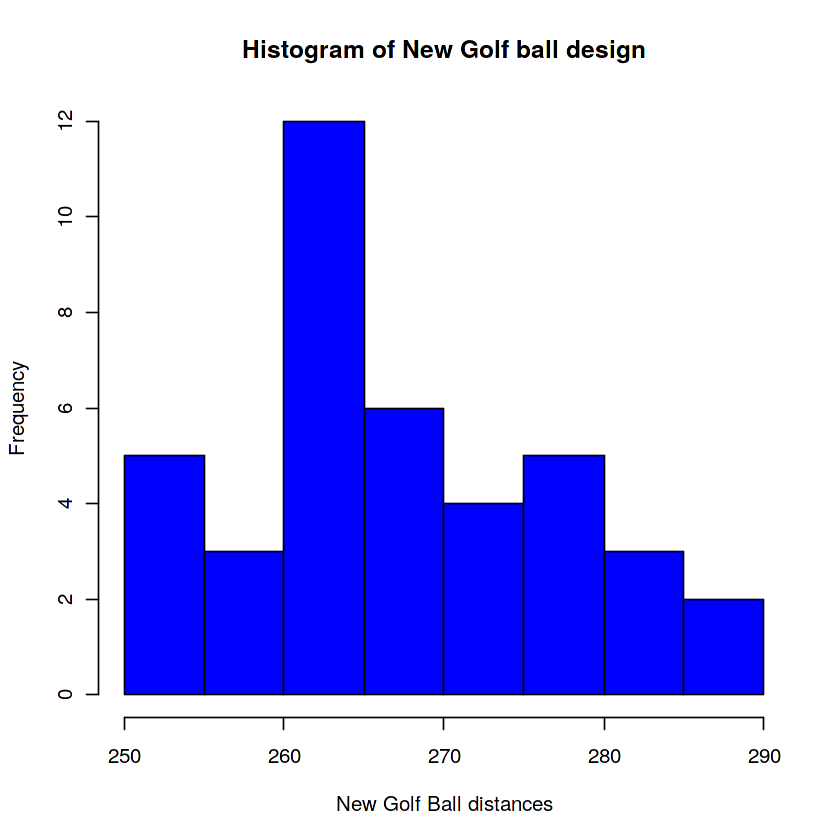

In [4]:
### Descriptive statistics #### 

library(ggplot2)
summary(golf)

qplot(golf$Current,golf$New,main = "General Scatter Plot",xlab = "Current golf ball dist",ylab = "New golf ball dist" )

boxplot(golf$Current,golf$New,horizontal = TRUE,main = "Box - Plot")

legend("topright",c("Current golf design","New coated golf design"),cex=0.8,pch=15)

hist(golf$Current,col="red",main = "Histogram of current golf balls",xlab="Current Golf Ball distances")

hist(golf$New,col="blue",main = "Histogram of New Golf ball design",xlab="New Golf Ball distances")


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




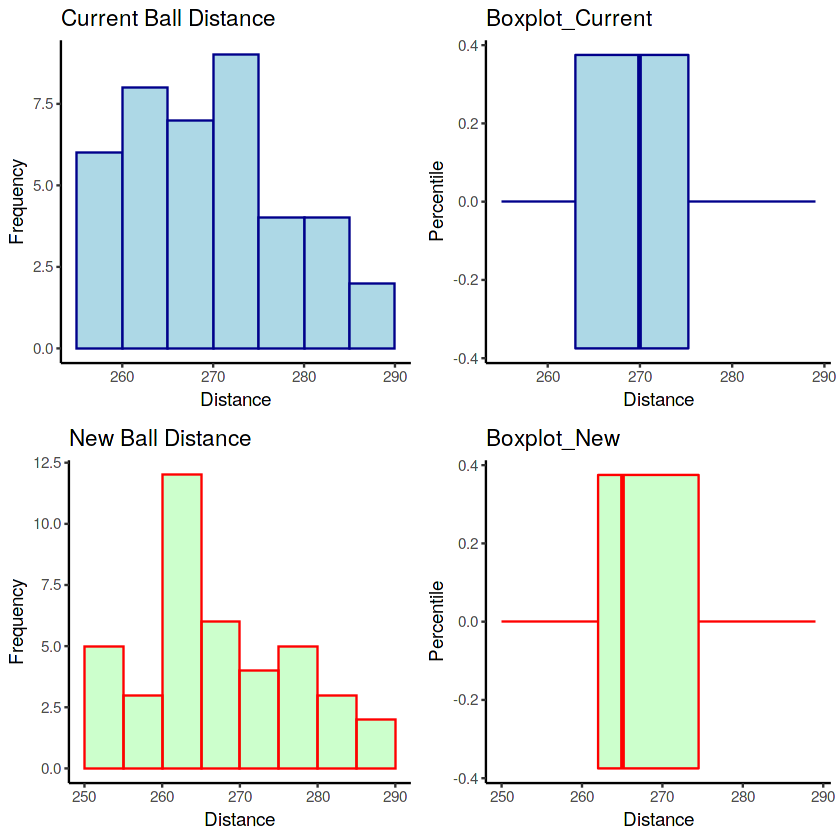

In [5]:
library(gridExtra)
library(dplyr)

C =ggplot(data=golf,aes(x=Current))+geom_histogram(breaks=seq(255,290,5),color="darkblue", fill="lightblue")+theme_classic()+labs(title="Current Ball Distance",x="Distance", y = "Frequency")
N =ggplot(data=golf,aes(x=New))+geom_histogram(breaks=seq(250,290,5),color="red", fill="green",alpha=.2)+theme_classic()+labs(title="New Ball Distance",x="Distance", y = "Frequency")
C_box =ggplot(data=golf,aes(x=Current))+geom_boxplot(color="darkblue", fill="lightblue")+theme_classic()+labs(title="Boxplot_Current",x="Distance",y="Percentile")
N_box =ggplot(data=golf,aes(x=New))+geom_boxplot(color="red", fill="green",alpha=.2)+theme_classic()+labs(title = "Boxplot_New",x="Distance",y="Percentile")


grid.arrange(C,C_box,N,N_box, ncol=2,nrow=2)


In [6]:
#Outlier test
O1=boxplot(golf$Current, plot=F)$out#Outlier for Current ball data
O2=boxplot(golf$New, plot=F)$out#Outlier for New ball data


Observations: 
* Both the samples seems to be normally distributed. 
* Mean and Median Values have slight difference. 

The new coated design data looks more normally distributed and left skewed, whereas the old design data looks right skewed. 
A general scatter plot shows very weak correlation between the values which shows that each value/data is unbiased with different values from test results.


[1] -0.08272974

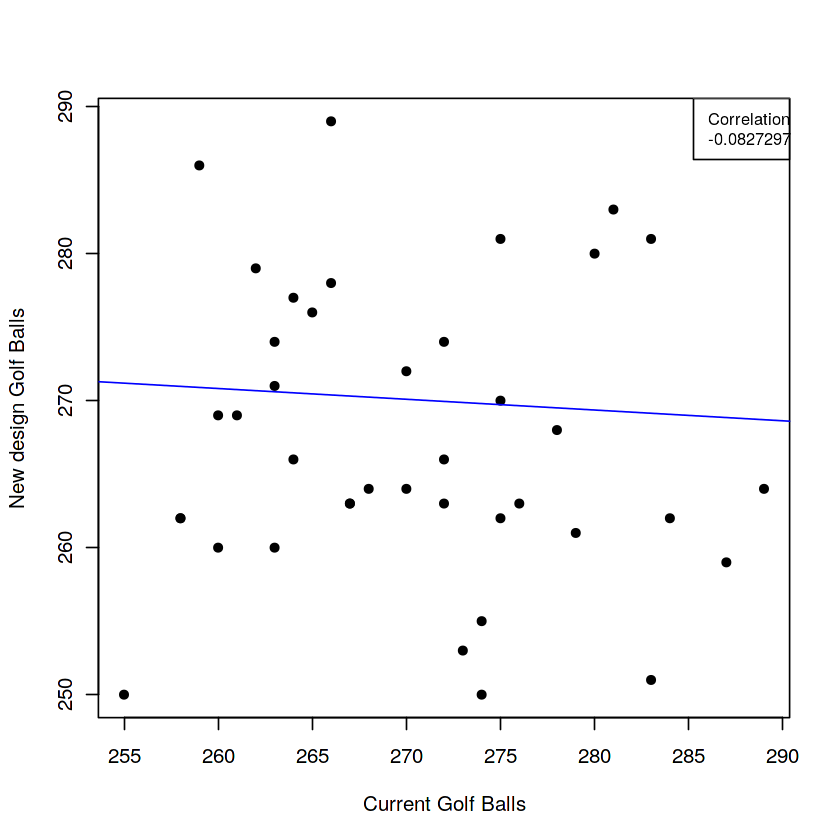

In [7]:
### Correlation ####

corrltion<-cor(golf$Current,golf$New,method = "pearson")
corrltion

plot(golf$Current,golf$New,xlab = "Current Golf Balls",ylab = "New design Golf Balls",pch=16)

yyy<-lm(golf$Current~golf$New,data = golf)

abline(yyy,col="blue")

legend("topright",c("Correlation Coeff = ",corrltion),cex = 0.8 )

### Defining Null and Alternate Hypothesis

* The level of significance (Alpha ) = 0.05. 
* The sample size , N = 40 which is large for a Zstat Test for 1 sample.
* But since there are two independent samples, we have to use a Tstat test. 
* Degree of Freedom: Since the sample is the same for both Sampling tests, we have (N-1)*2 degrees of freedom : 78

Null Hypothesis: 

It is a hypothesis/status quo that says there is no statistical significance between the two variables. The null hypothesis is formulated such that the rejection of the null hypothesis proves the alternative hypothesis is true

Alternate Hypothesis : 
It is one that states there is a statistically significant relationship between two variables. The alternative hypothesis is the hypothesis used in hypothesis testing that is contrary to the null hypothesis.
A hypothesis test that Par Inc. could use to compare the driving distance of the current and new golf balls.

Hypothesis Formulation :

Null Hypothesis :  No difference between the mean distances for the two models due to change in the design.
                                                                H0 : µ1 = µ2  i.e  µ1 -  µ2 = 0
Alternate Hypothesis : There is difference between the mean distances for the two models due to change in the design.
                                                               Ha : µ1  ≠  µ2  i.e  µ1 -  µ2  ≠ 0
T Test Equation: 

                 𝑡𝑠𝑡𝑎𝑡=(𝑑̅− 𝜇𝐷)/𝑆𝑑√𝑛 Here 𝑆𝑑= √Σ(𝐷− 𝐷)̅̅̅̅2𝑛−1 and 𝑑𝑓=𝑛−1


Based on the details shared for the Par Inc. project, we can assume the following:
* 	Two populations
* 	No other influence factors considered
* 	Independently chosen

Since there are two independent sample case. The two-tailed test will be applicable for the project. The p-value is calculated using the R function ‘t.test’.


In [8]:
#----------------------------------------------------------------------------
#### t test ###

x<-t.test(golf$Current,golf$New,var.equal = TRUE)
x
ifelse(x$p.value<0.05,

  print("Reject Null Hypothesis : accept that there is difference in mean distances travelled due to design changes")


  ,print("Accept Null Hypothesis : accept that There is no difference in mean distances travelled due to design changes"))


	Two Sample t-test

data:  golf$Current and golf$New
t = 1.3284, df = 78, p-value = 0.1879
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.383958  6.933958
sample estimates:
mean of x mean of y 
  270.275   267.500 


[1] "Accept Null Hypothesis : accept that There is no difference in mean distances travelled due to design changes"


[1] "Accept Null Hypothesis : accept that There is no difference in mean distances travelled due to design changes"

P – Value : 0.1879

Since it is a two-tailed test, the p-value = 0.1879 ÷ 2 = 0.094 (approx.)
The calculated p-value is greater than level of significance α (0.05). Therefore, the Null Hypothesis (H0) will not be rejected. 


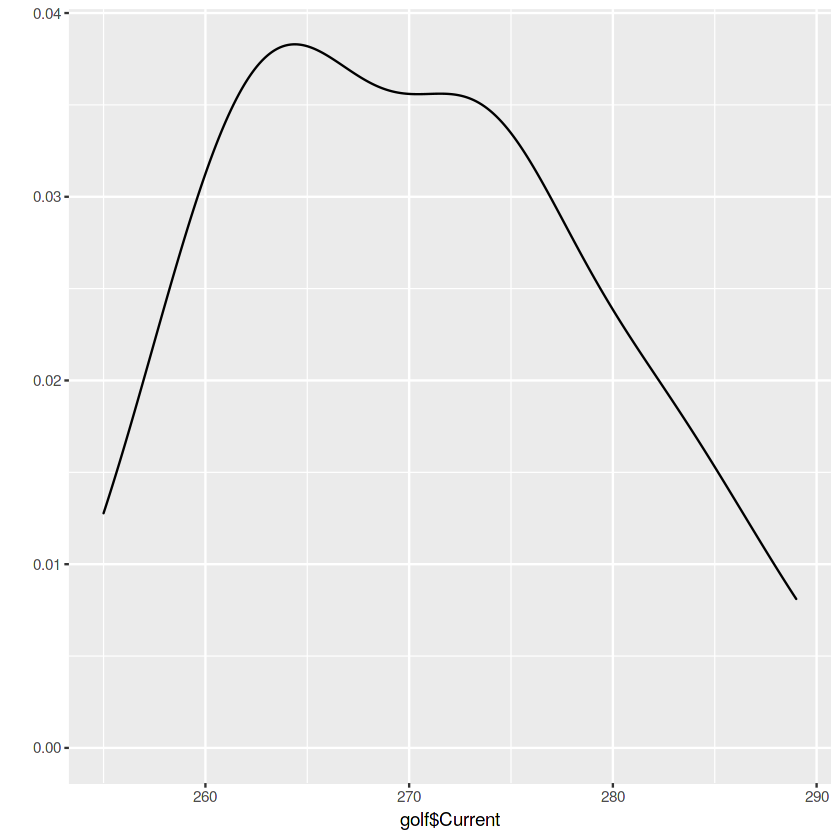

[1] 270.275

[1] 8.752985

Loading required package: lattice

Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




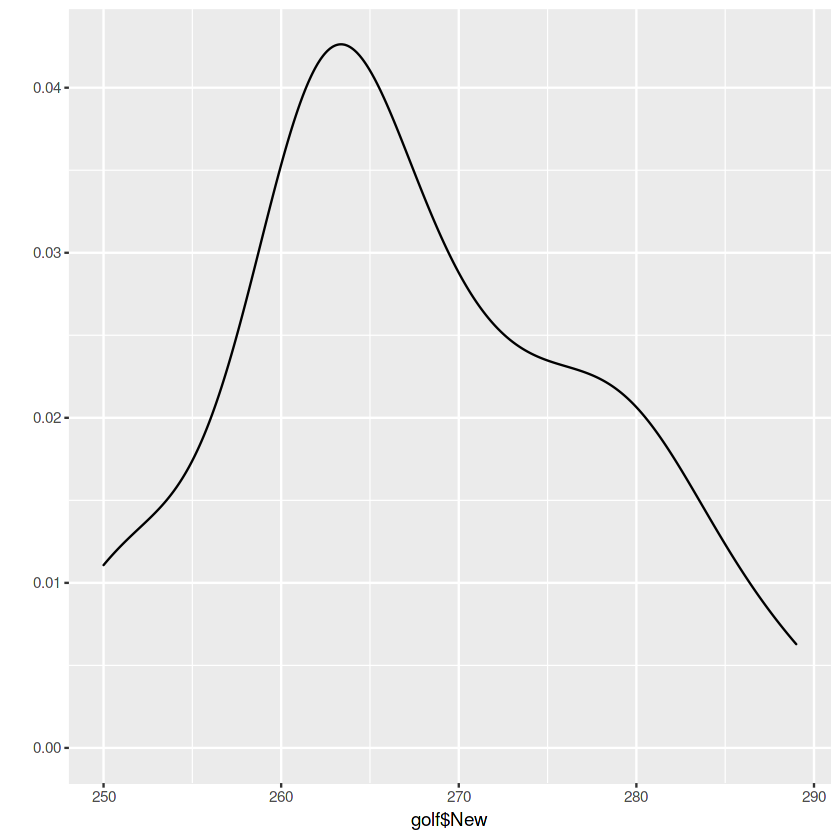

In [9]:
###  Confidence Interval estimate ###

qplot(golf$Current,geom = "density")
qplot(golf$New,geom = "density")

mean(golf$Current)
sd(golf$Current)

library(Rmisc)
library(lattice)
library(plyr)

Inference: The 95% confidence interval of sample mean for Current model is between 273.0743    & 267.4757. This implies that, with 95% confidence, we can say that the sample mean driving distance of current balls will be within this range.

In [10]:
### Function for CI estimate from Rmisc##

CI(golf$Current,ci = 0.95)
CI(golf$New,ci = 0.95)

diff <- mean(golf$Current) - mean(golf$New)


upper     mean    lower 
273.0743 270.2750 267.4757

upper     mean    lower 
270.6652 267.5000 264.3348

In [11]:
# Need for larger sample size

df1 <- 40-1
df2 <- 40-1

sdcurrent <- sd(golf$Current)
sdnew <- sd(golf$New)

pooldsd <- sqrt((df1*(sdcurrent^2) + df2*(sdnew^2))/(df1+df2))

In [12]:
## power T test

power.t.test(n=length(golf$New),delta = diff,sd = pooldsd, sig.level = 0.05,type = "two.sample",alternative = "two.sided")

### to get the required sample size ###

largersample<-power.t.test(power = 0.95,delta = diff,sd = pooldsd,sig.level = 0.188,type = "two.sample",alternative = "two.sided")
largersample$n



     Two-sample t test power calculation 

              n = 40
          delta = 2.775
             sd = 9.342469
      sig.level = 0.05
          power = 0.2585147
    alternative = two.sided

NOTE: n is number in *each* group


[1] 199.2345

Inference: The Power of test is 0.25851 or 25.8%, which means there are only 25% chances that the null hypothesis will not be rejected when it is false.(Type II Error)

#### Recommendation
According to the test is there is no significant change in the driving distance due to the change in design.But the new ball design have lower mean value (267.5) and higher variance (97.94) compared to Current ball (mean:270.3 & variance:76.61) which showcase the difference in outcome.Lastly the sampling error are still unknown making the case ambiguous.So my suggestion would be to collect more samples for the same and identifying more variable which may directly or indirectly effect the total outcome.
 
<ins>What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population? Do you see a need for larger sample sizes and more testing with the golf balls?</ins>
 + 95% confidence interval for Current balls driving distance mean is [267.4757   TO   273.0743]
 + 95% confidence interval for New balls driving distance mean is [264.3348    TO    270.6652]
 + 95% confidence interval for difference in mean is [-1.384937  TO  6.934937]
 


#### Conclusion 
 From the given data, it may be concluded that, statistically there is no significance change in driving distance due to new coating on golf balls. However, our recommendation is that the test be carried out with a larger sample size covering number of golf courses (at least a five different) to improve the accuracy of the test results and negating any effect of one type of ground. Also, the results need to interpreted and future actions be planned with the understanding of other characteristics like size, shape, weight etc.